# Занятие 3

Исследовательский анализ данных (построение графиков, выявление связи между переменными). Визуализация результатов. Построение графиков при помощи matplotlib. Настройки стилей оформления графиков. Трехмерные графики, анимация.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Линейные графики

Линейные графики — это последовательность точек данных на линии. Каждая точка состоит из пары значений (x, y), которые перенесены на график в соответствии с масштабами осей (x и y).

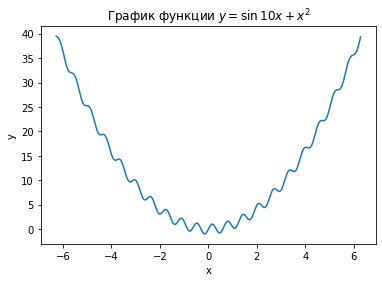

In [32]:
x = np.arange(-2*np.pi,2*np.pi,0.01)
y = np.sin(10*x) + x**2
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('График функции $y = \sin{10x} + x^{2}$')
plt.show()

Для анализа воспользуемсся датасетом по мультфильмам: https://www.kaggle.com/datasets/asaniczka/52000-animation-movie-details-dataset-2024?select=Animation_Movies.csv

In [33]:
df = pd.read_csv('Animation_Movies.csv')

In [34]:
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,150540,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,False,/j29ekbcLpBvxnGk6LjdTc2EI5SA.jpg,...,en,Inside Out,"Growing up can be a bumpy road, and it's no ex...",107.292,/2H1TmgdfNtsKlU9jKdeNyYL5y8T.jpg,Meet the little voices inside your head.,"Animation, Family, Adventure, Drama, Comedy","Pixar, Walt Disney Pictures",United States of America,English
1,14160,Up,7.949,18857,Released,2009-05-28,735099082,96,False,/hGGC9gKo7CFE3fW07RA587e5kol.jpg,...,en,Up,Carl Fredricksen spent his entire life dreamin...,90.968,/vpbaStTMt8qqXaEgnOR2EE4DNJk.jpg,The greatest adventure is just getting back home.,"Animation, Comedy, Family, Adventure",Pixar,United States of America,English
2,12,Finding Nemo,7.824,18061,Released,2003-05-30,940335536,100,False,/h3uqFk7sZRJvLZDdLiFB9qwbL07.jpg,...,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",55.456,/ggQ6o8X5984OCh3kZi2UIJQJY5y.jpg,There are 3.7 trillion fish in the ocean. They...,"Animation, Family",Pixar,United States of America,English
3,354912,Coco,8.222,17742,Released,2017-10-27,800526015,105,False,/askg3SMvhqEl4OL52YuvdtY40Yb.jpg,...,en,Coco,Despite his family’s baffling generations-old ...,166.578,/gGEsBPAijhVUFoiNpgZXqRVWJt2.jpg,The celebration of a lifetime,"Family, Animation, Fantasy, Music, Comedy, Adv...","Pixar, Walt Disney Pictures",United States of America,"English, Spanish"
4,10681,WALL·E,8.078,17446,Released,2008-06-22,521311860,98,False,/fK5ssgvtI43z19FoWigdlqgpLRE.jpg,...,en,WALL·E,What if mankind had to leave Earth and somebod...,58.517,/hbhFnRzzg6ZDmm8YAmxBnQpQIPh.jpg,After 700 years of doing what he was built for...,"Animation, Family, Science Fiction","Pixar, Walt Disney Pictures",United States of America,English


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51945 entries, 0 to 51944
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    51945 non-null  int64  
 1   title                 51944 non-null  object 
 2   vote_average          51945 non-null  float64
 3   vote_count            51945 non-null  int64  
 4   status                51945 non-null  object 
 5   release_date          49808 non-null  object 
 6   revenue               51945 non-null  int64  
 7   runtime               51945 non-null  int64  
 8   adult                 51945 non-null  bool   
 9   backdrop_path         15835 non-null  object 
 10  budget                51945 non-null  int64  
 11  homepage              8253 non-null   object 
 12  imdb_id               29552 non-null  object 
 13  original_language     51945 non-null  object 
 14  original_title        51944 non-null  object 
 15  overview           

In [36]:
df.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity
count,5.194500e+04,51945.000000,51945.000000,5.194500e+04,51945.000000,5.194500e+04,51945.000000
mean,6.188122e+05,2.597083,40.395380,1.863464e+06,20.901415,5.759513e+05,1.886233
std,3.479748e+05,3.318748,482.705948,3.049824e+07,39.016002,7.606628e+06,9.700913
min,1.200000e+01,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,3.300810e+05,0.000000,0.000000,0.000000e+00,3.000000,0.000000e+00,0.600000
50%,6.119150e+05,0.000000,0.000000,0.000000e+00,7.000000,0.000000e+00,0.600000
75%,9.159040e+05,6.000000,2.000000,0.000000e+00,19.000000,0.000000e+00,0.882000
max,1.238314e+06,10.000000,19463.000000,1.450027e+09,3720.000000,2.600000e+08,1008.942000


Построим график показывающий как менялсь число выпусаемых анимаций по датам выпуска.

In [37]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [38]:
df['release_date'].value_counts()

2017-01-01    291
2013-01-01    220
2011-01-01    219
2006-01-01    203
2005-01-01    202
             ... 
2016-05-19      1
1956-01-26      1
1917-05-07      1
1977-09-18      1
1984-12-08      1
Name: release_date, Length: 16893, dtype: int64

In [39]:
df['release_date'].min()

Timestamp('1878-05-07 00:00:00')

In [40]:
df['release_date'].max()

Timestamp('2026-12-31 00:00:00')

In [41]:
df[df['release_date'] == df['release_date'].min()]

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
4025,751212,The Musician Monkey,6.048,21,Released,1878-05-07,0,1,False,NaN,...,xx,Le Singe Musicien,A pre-cinematograph colour animation of the mo...,1.031,/fx2gnyV2n9KdOCyGzQtVnpB9bIg.jpg,NaN,Animation,NaN,France,No Language
4592,766094,The Magic Rosette,5.583,17,Released,1878-05-07,0,1,False,NaN,...,xx,La Rosace Magique,Praxinoscope strip of a shifting rosette. Seri...,1.108,/5zeVMAp3R4QHGarSc4Bf3B1uBY2.jpg,NaN,Animation,NaN,France,No Language
7015,921939,Le Jeu de Corde,4.625,8,Released,1878-05-07,0,1,False,NaN,...,xx,Le Jeu de Corde,Praxinoscope of a girl in a blue dress skippin...,0.600,/iKTR6sHpR0C7LEyV6l9UA1JdTHH.jpg,NaN,Animation,NaN,France,No Language
7018,921940,"Zim, Boum, Boum",4.125,8,Released,1878-05-07,0,1,False,NaN,...,xx,"Zim, Boum, Boum",Praxinoscope animation of a green-suited boy w...,1.400,/ftOeRoWuBG23f1Dqd3Vmc0A2GQm.jpg,NaN,Animation,NaN,France,No Language
8489,921930,Dancing on the Rope,4.200,5,Released,1878-05-07,0,1,False,NaN,...,en,La Danse sur la Corde,Early Praxinoscope strip showing a girl dancin...,0.600,/hIOqTlvdky4Z4edd0QiB1x04npz.jpg,NaN,Animation,NaN,France,No Language
8510,922513,L'Équilibriste,4.200,5,Released,1878-05-07,0,1,False,NaN,...,xx,L'Équilibriste,Praxinoscope animation of a child laying down ...,0.600,/fVEfsu10MxcXG5s8DPXCTfqk7ZY.jpg,NaN,Animation,NaN,France,No Language
9757,922010,Les Papillons,4.000,4,Released,1878-05-07,0,1,False,NaN,...,xx,Les Papillons,Praxinoscope animation of a butterfly flutteri...,0.600,/nH9Lsvdo3icACe3AaW6j6YrbdR2.jpg,NaN,Animation,NaN,France,No Language
9758,922011,Le Trapèze,5.000,4,Released,1878-05-07,0,1,False,NaN,...,xx,Le Trapèze,Praxinoscope animation of a man spinning aroun...,0.961,/ykhF8AiAhSeKTDl1FfnlR7le7I.jpg,NaN,Animation,NaN,France,No Language
9759,922013,La Charmeuse,5.000,4,Released,1878-05-07,0,1,False,NaN,...,xx,La Charmeuse,Praxinoscope animation of a girl charming a fl...,0.600,/bTVPmt4Nl0myTOy9cKaiRFfrcGd.jpg,NaN,Animation,NaN,France,No Language
9760,922015,La Balançoire,4.500,4,Released,1878-05-07,0,1,False,NaN,...,xx,La Balançoire,Praxinoscope animation of two children playing...,0.600,/5r72HjkKXHoMg3zvXPXuAA6CaKL.jpg,NaN,Animation,NaN,France,No Language


In [42]:
df[df['release_date'] == df['release_date'].max()]

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
26469,1201768,On The Edge: Donnie Dares!,0.0,0,Released,2026-12-31,0,75,False,NaN,...,en,On The Edge: Donnie Dares!,Lots of people have never heard of these six e...,0.0,/63iMSK87z0GdXH0eEl0h7EF0cS3.jpg,NaN,Animation,Studio 100 Animation,United States of America,NaN


In [43]:
df_gr = df.groupby(['release_date']).agg('count')['id']
df_gr

release_date
1878-05-07    25
1885-01-01     1
1892-10-28     3
1894-12-15     2
1896-08-01     1
              ..
2025-10-11     1
2025-11-20     1
2025-12-26     1
2026-10-09     1
2026-12-31     1
Name: id, Length: 16893, dtype: int64

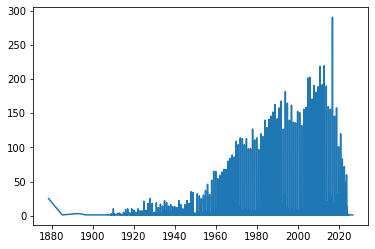

In [44]:
plt.plot(df_gr)
plt.show()

Добавим месяц и год выпуска анимации.

In [45]:
df['month_release'] = df['release_date'].dt.month

In [46]:
df['year_release'] = df['release_date'].dt.year

In [47]:
df_gr_m = df.groupby(['month_release']).agg('count')['id']
df_gr_m

month_release
1.0     11960
2.0      2837
3.0      3557
4.0      2958
5.0      3139
6.0      4063
7.0      3101
8.0      2848
9.0      3783
10.0     4250
11.0     3611
12.0     3701
Name: id, dtype: int64

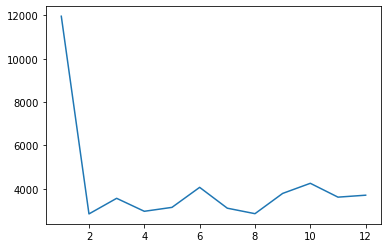

In [48]:
plt.plot(df_gr_m)
plt.show()

In [49]:
df_gr_y = df.groupby(['year_release']).agg('count')['id']
df_gr_y

year_release
1878.0      25
1885.0       1
1892.0       3
1894.0       2
1896.0       1
          ... 
2022.0    2247
2023.0    1907
2024.0     103
2025.0      10
2026.0       2
Name: id, Length: 130, dtype: int64

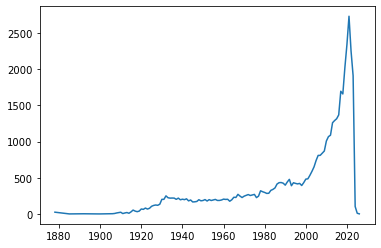

In [50]:
plt.plot(df_gr_y)
plt.show()

## Гистограммы

Гистограмма состоит из примыкающих прямоугольников, расположенных вдоль оси x, которые разбиты на дискретные интервалы, их называют bins. Их площадь пропорциональна частоте конкретного интервала. Такой способ визуализации часто используют в статистике для демонстрации распределения.

Для представления гистограммы в pyplot есть функция hist(). У нее также есть особенности, которых не найти у других функций, отвечающих за создание графиков. hist() не только рисует гистограмму, но также возвращает кортеж значений, представляющих собой результат вычислений гистограммы. 

In [51]:
arr = np.random.randint(0, 1000, 500)
arr

array([381, 589, 272, 758,  17, 523, 654, 996, 910, 959,  99, 699, 217,
       271, 590,  16, 703, 350, 325, 804, 477, 226, 589,  72, 837, 110,
       435, 590, 709, 549, 930, 167, 469, 499, 335, 671, 229, 114, 194,
       465, 413, 321, 612, 100, 492, 365, 630, 178, 808, 428, 669, 668,
       738, 115, 294, 806, 985, 679, 536, 194, 185, 527, 994, 333, 788,
       496, 157, 197, 101, 441, 169, 746, 522, 533, 876, 173, 631, 924,
       314, 417, 923, 287, 843, 987, 444, 795, 988, 990, 158,  45, 891,
       877, 318, 987, 708, 601, 293, 830, 369, 158, 796, 294, 656, 135,
       337,  93, 281, 476, 329, 275, 965, 943, 975, 122, 469, 165, 329,
       356, 980, 490, 127, 916, 250, 782, 627, 110, 638, 432, 896, 658,
        35, 568, 206, 330, 737, 100, 564,  40, 802, 829, 334, 531, 528,
       503, 428, 229, 836,  78,  84, 133, 512, 705, 727, 643, 699, 736,
       360, 431, 719, 188, 433, 521, 496, 378, 948, 229, 742, 499, 146,
       179, 759,  55, 333, 709, 604, 856, 156, 116, 426, 505, 64

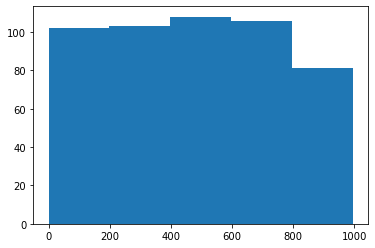

In [52]:
n, bin, patches = plt.hist(arr, bins = 5)
plt.show()

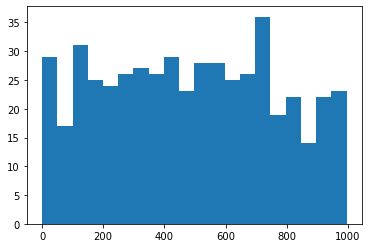

In [53]:
n, bin, patches = plt.hist(arr, bins = 20)
plt.show()

## Столбчатые диаграммы

Столбчатые диаграммы похожи на гистограммы, но на оси x тут располагаются не числовые значения, а категории.

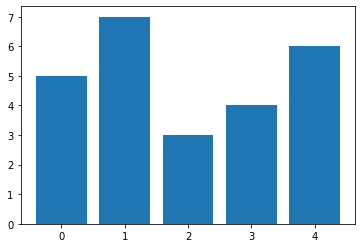

In [54]:
index = [0,1,2,3,4]
values = [5,7,3,4,6]
plt.bar(index,values)
plt.show()

На диаграмме видно, что метки на оси x написаны под каждым столбцом. Поскольку каждый из них относится к отдельной категории, правильнее обозначать их строками. Для этого используется функция xticks(). А для правильного размещения нужно передать список со значениями позиций в качестве первого аргумента в той же функции. Результатом будет такая диаграмма.

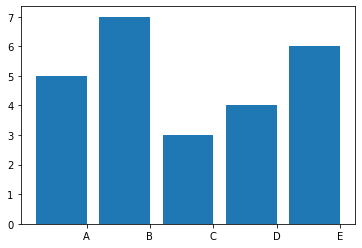

In [55]:
index = np.arange(5)
values1 = [5,7,3,4,6]
plt.bar(index, values1)
plt.xticks(index+0.4,['A','B','C','D','E'])
plt.show()

Добавить величины стандартного отклонения с помощью аргумента yerr вместе с соответствующими значениями. Часто этот аргумент используется вместе с error_kw, который принимает другие аргументы, отвечающие за представление погрешностей. Два из них — это eColor, который определяет цвета колонок погрешностей и capsize — ширину поперечных линий, обозначающих окончания этих колонок.

Еще один именованный аргумент — alpha. Он определяет степень прозрачности цветной колонки. Его значением может быть число от 0 до 1, где 0 — полностью прозрачный объект.

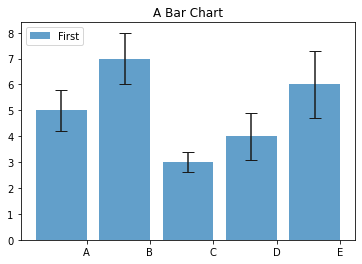

In [56]:
index = np.arange(5)
values1 = [5,7,3,4,6]
std1 = [0.8,1,0.4,0.9,1.3]
plt.title('A Bar Chart')
plt.bar(index, values1, yerr=std1, error_kw={'ecolor':'0.1','capsize':6},alpha=0.7,label='First')
plt.xticks(index+0.4,['A','B','C','D','E'])
plt.legend(loc=2)
plt.show()

Для построения горизонтальной столбчатой диаграммы есть специальная функция barh().

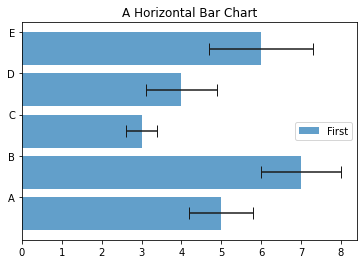

In [59]:
index = np.arange(5)
values1 = [5,7,3,4,6]
std1 = [0.8,1,0.4,0.9,1.3]
plt.title('A Horizontal Bar Chart')
plt.barh(index, values1, xerr=std1, error_kw={'ecolor':'0.1','capsize':6},alpha=0.7,label='First')
plt.yticks(index+0.4,['A','B','C','D','E'])
plt.legend(loc=5)
plt.show()

Можно строить многорядные столбчатые диаграммы:

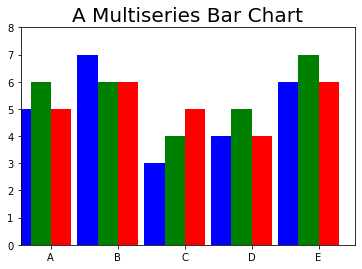

In [60]:
values1 = [5,7,3,4,6]
values2 = [6,6,4,5,7]
values3 = [5,6,5,4,6]
bw = 0.3
plt.axis([0,5,0,8])
plt.title('A Multiseries Bar Chart', fontsize=20)
plt.bar(index, values1, bw, color='b')
plt.bar(index+bw, values2, bw, color='g')
plt.bar(index+2*bw, values3, bw, color='r')
plt.xticks(index+1.5*bw,['A','B','C','D','E'])
plt.show()

В случае с горизонтальными многорядными столбчатыми диаграммами все работает по тому же принципу. Функцию bar() нужно заменить на соответствующую barh(), а также не забыть заменить xticks() на yticks().

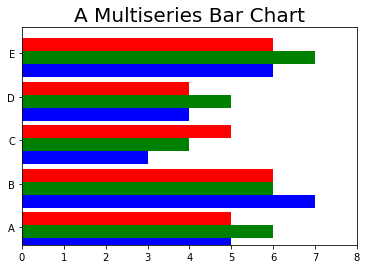

In [61]:
index = np.arange(5)
values1 = [5,7,3,4,6]
values2 = [6,6,4,5,7]
values3 = [5,6,5,4,6]
bw = 0.3
plt.axis([0,8,0,5])
plt.title('A Multiseries Bar Chart', fontsize=20)
plt.barh(index, values1, bw, color='b')
plt.barh(index+bw, values2, bw, color='g')
plt.barh(index+2*bw, values3, bw, color='r')
plt.yticks(index+0.4,['A','B','C','D','E'])
plt.show()

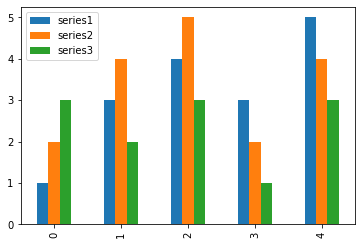

In [62]:
import pandas as pd

index = np.arange(5)
data = {'series1': [1,3,4,3,5],
        'series2': [2,4,5,2,4],
        'series3': [3,2,3,1,3]}
df1 = pd.DataFrame(data)
df1.plot(kind='bar')
plt.show()

Еще один способ представления многорядного столбчатого графика — сложенная форма, где каждый столбец установлен поверх другого. Это особенно полезно в том случае, когда нужно показать общее значение суммы всех столбцов.

Для превращения обычного многорядного столбчатого графика в сложенный нужно добавить именованный аргумент bottom в каждую функцию bar(). Каждый объект Series должен быть присвоен соответствующему аргументу bottom. Результатом будет сложенный столбчатый график.

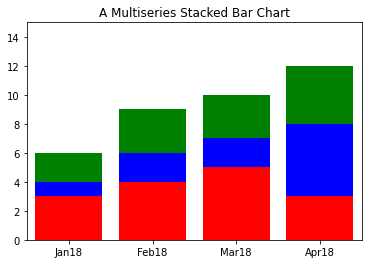

In [63]:
series1 = np.array([3,4,5,3])
series2 = np.array([1,2,2,5])
series3 = np.array([2,3,3,4])
index = np.arange(4)
plt.axis([-0.5,3.5,0,15])
plt.title('A Multiseries Stacked Bar Chart')
plt.bar(index,series1,color='r')
plt.bar(index,series2,color='b',bottom=series1)
plt.bar(index,series3,color='g',bottom=(series2+series1))
plt.xticks(index,['Jan18','Feb18','Mar18','Apr18'])
plt.show()

Для создания аналогичного горизонтального графика нужно заменить bar() на barh(), функцию xticks() необходимо поменять местами с yticks(), потому что метки категорий теперь будут расположены по оси y. После этого будет создан следующий горизонтальный график.

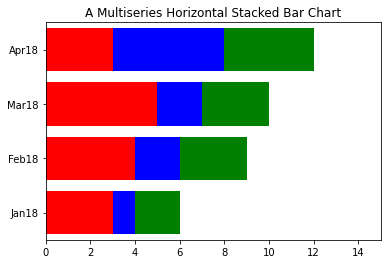

In [64]:
series1 = np.array([3,4,5,3])
series2 = np.array([1,2,2,5])
series3 = np.array([2,3,3,4])
index = np.arange(4)
plt.axis([0,15,-0.5,3.5])
plt.title('A Multiseries Horizontal Stacked Bar Chart')
plt.barh(index,series1,color='r')
plt.barh(index,series2,color='b',left=series1)
plt.barh(index,series3,color='g',left=(series2+series1))
plt.yticks(index,['Jan18','Feb18','Mar18','Apr18'])
plt.show()

До сих пор объекты Series разделялись только по цветам. Но можно использовать, например, разную штриховку. Для этого сперва необходимо сделать цвет столбца белым и использовать именованный аргумент hatch для определения типа штриховки. Все они выполнены с помощью символов (|, /, -, \, *), соответствующих стилю столбца. Чем чаще он повторяется, тем теснее будут расположены линии. Так, /// — более плотный вариант чем //, а этот, в свою очередь, плотнее /.

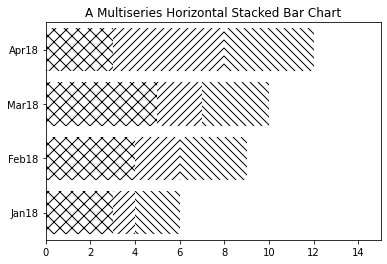

In [65]:
series1 = np.array([3,4,5,3])
series2 = np.array([1,2,2,5])
series3 = np.array([2,3,3,4])
index = np.arange(4)
plt.axis([0,15,-0.5,3.5])
plt.title('A Multiseries Horizontal Stacked Bar Chart')
plt.barh(index,series1,color='w',hatch='xx')
plt.barh(index,series2,color='w',hatch='///',left=series1)
plt.barh(index,series3,color='w',hatch='\\\\\\',left=(series2+series1))
plt.yticks(index,['Jan18','Feb18','Mar18','Apr18'])
plt.show()

## Круговые диаграммы

Круговые диаграммы — распространенный способ показать, какую часть от общего количества (например, годового объема продаж) составляют отдельные значения (например, квартальный объем продаж). Круговые диаграммы обычно используются для сравнения групп.

Этот тип графика можно получить с помощью функции pie(). Задать последовательность цветов можно используя аргумент colors. В таком случае придется присвоить список строк, каждая из которых будет содержать название цвета. Еще одна возможность — добавление меток каждой доле. Для этого есть labels, которой присваивает список строк с метками в последовательности.

Чтобы диаграмма была идеально круглой, необходимо в конце добавить функцию axix() со строкой equal в качестве аргумента.

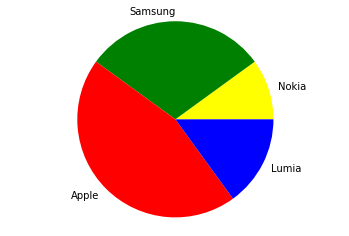

In [66]:
labels = ['Nokia','Samsung','Apple','Lumia']
values = [10,30,45,15]
colors = ['yellow','green','red','blue']
plt.pie(values,labels=labels,colors=colors)
plt.axis('equal')
plt.show()

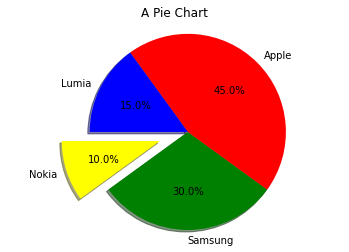

In [67]:
labels = ['Nokia','Samsung','Apple','Lumia']
values = [10,30,45,15]
colors = ['yellow','green','red','blue']
explode = [0.3,0,0,0]
plt.title('A Pie Chart')
plt.pie(values,labels=labels,colors=colors,explode=explode,shadow=True,autopct='%1.1f%%',startangle=180)
plt.axis('equal')
plt.show()

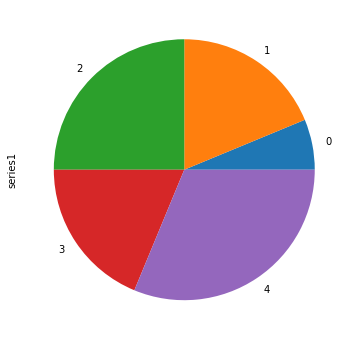

In [68]:
data = {'series1': [1,3,4,3,5],
        'series2': [2,4,5,2,4],
        'series3': [3,2,3,1,3]}
df1 = pd.DataFrame(data)
df1['series1'].plot(kind='pie', figsize=(6,6))
plt.show()

In [69]:
df['production_countries'].value_counts()

United States of America           12836
Japan                               5182
France                              2136
United Kingdom                      1854
Canada                              1616
                                   ...  
Belize, France, Mexico                 1
South Korea, France                    1
United Kingdom, Norway                 1
Russia, Hungary                        1
Bosnia and Herzegovina, Croatia        1
Name: production_countries, Length: 1096, dtype: int64

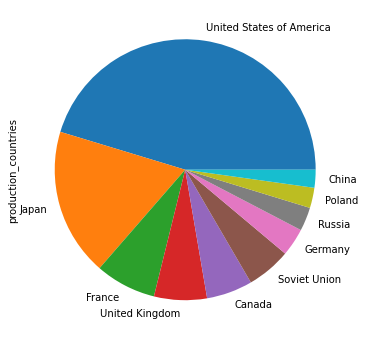

In [70]:
df['production_countries'].value_counts().head(10).plot(kind='pie', figsize=(6,6))
plt.show()

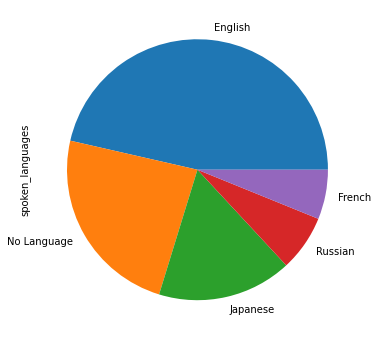

In [71]:
df['spoken_languages'].value_counts().head(5).plot(kind='pie', figsize=(6,6))
plt.show()

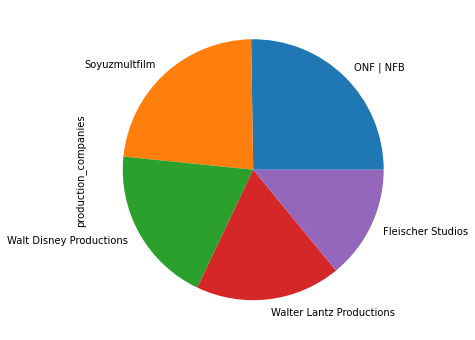

In [72]:
df['production_companies'].value_counts().head(5).plot(kind='pie', figsize=(6,6))
plt.show()

### Графики для отображения выбросов в данных

*Повторение материала прошлого занятия*

"Ящик с усами" (диаграмма размаха, усиковая диаграмма, англ. box-and-whiskers diagram, box-and-whiskers plot, box plot) — график, использующийся в описательной статистике, компактно изображающий одномерное распределение вероятностей.

Такой вид диаграммы в удобной форме показывает медиану (или, если нужно, среднее), нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы.

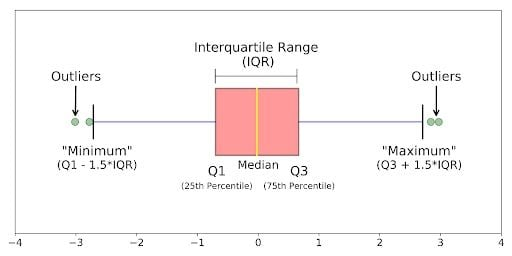

Подробнее про boxplot можно посмотреть: https://builtin.com/data-science/boxplot

### Типы boxplots

In [73]:
df.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity,month_release,year_release
count,5.194500e+04,51945.000000,51945.000000,5.194500e+04,51945.000000,5.194500e+04,51945.000000,49808.000000,49808.000000
mean,6.188122e+05,2.597083,40.395380,1.863464e+06,20.901415,5.759513e+05,1.886233,5.729622,1995.695109
std,3.479748e+05,3.318748,482.705948,3.049824e+07,39.016002,7.606628e+06,9.700913,3.822580,28.183376
min,1.200000e+01,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,1878.000000
25%,3.300810e+05,0.000000,0.000000,0.000000e+00,3.000000,0.000000e+00,0.600000,2.000000,1981.000000
50%,6.119150e+05,0.000000,0.000000,0.000000e+00,7.000000,0.000000e+00,0.600000,6.000000,2007.000000
75%,9.159040e+05,6.000000,2.000000,0.000000e+00,19.000000,0.000000e+00,0.882000,9.000000,2018.000000
max,1.238314e+06,10.000000,19463.000000,1.450027e+09,3720.000000,2.600000e+08,1008.942000,12.000000,2026.000000


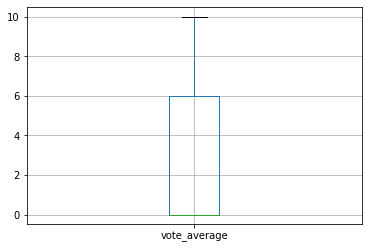

In [74]:
df[['vote_average']].boxplot();

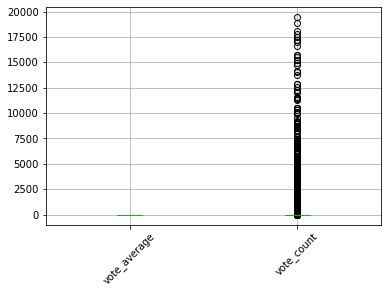

In [75]:
df[['vote_average', 'vote_count']].boxplot()
plt.xticks(rotation = 45);

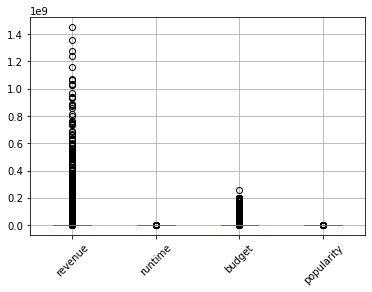

In [76]:
df[['revenue', 'runtime', 'budget', 'popularity']].boxplot()
plt.xticks(rotation = 45);

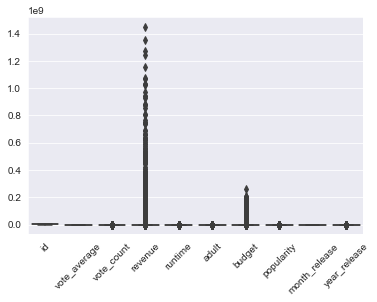

In [77]:
sns.set_style('darkgrid')

sns.boxplot(data=df)
plt.xticks(rotation = 45);

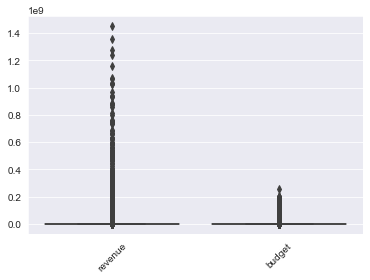

In [78]:
sns.set_style('darkgrid')

sns.boxplot(data=df[['revenue', 'budget']])
plt.xticks(rotation = 45);

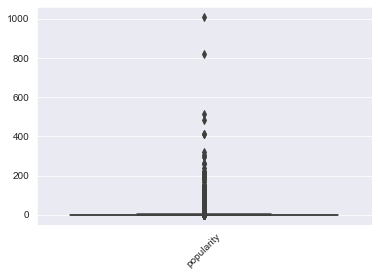

In [79]:
sns.set_style('darkgrid')

sns.boxplot(data=df[['popularity']])
plt.xticks(rotation = 45);

In [82]:
iris = sns.load_dataset('iris')

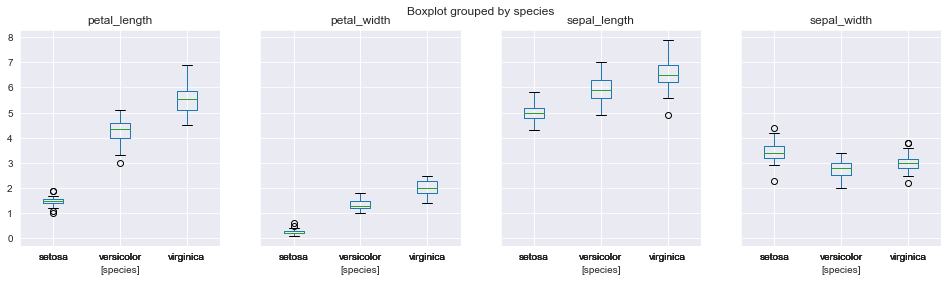

In [83]:
iris.boxplot(by='species', figsize=(16, 4), layout=(1, 4));

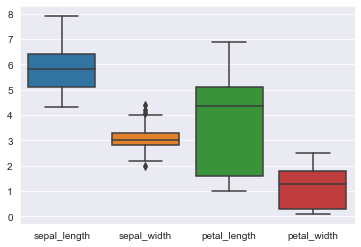

In [84]:
sns.set_style('darkgrid')

sns.boxplot(data=iris);

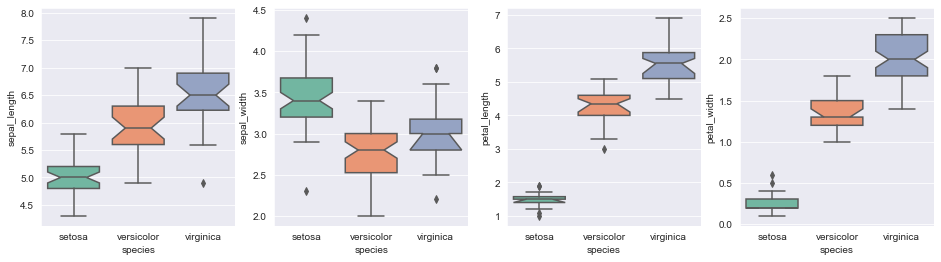

In [85]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4), sharey=False)

# Explicitly list the variables to map onto subplots
variables = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# For each of the variables, use a different subplot
for i, var in enumerate(variables):
    species_data = iris[[var, 'species']]
    sns.boxplot(x='species', y=var, data=species_data, ax=axes[i], palette='Set2',
                notch=True, bootstrap=10000)

## Матрица корреляций

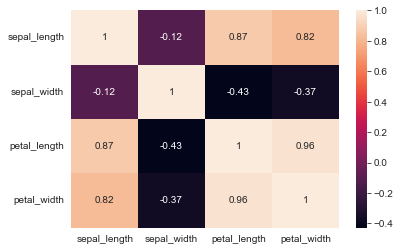

In [86]:
sns.heatmap(iris.corr(), annot = True);

## Трёхмерные графики

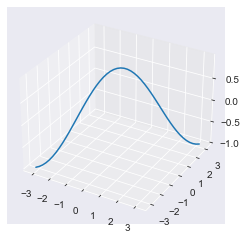

In [87]:
x = np.linspace(-np.pi, np.pi, 50)
y = x
z = np.cos(x)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label='parametric curve');

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


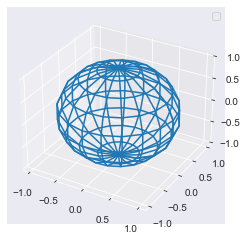

In [88]:
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z)
ax.legend();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


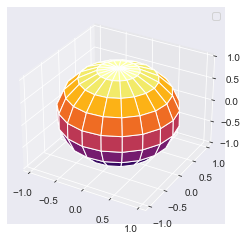

In [89]:
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='inferno')
ax.legend();

Подробнее про типы графиков в matplotlib и seaborn можно посмотреть по ссылкам: https://matplotlib.org/stable/gallery/index и https://matplotlib.org/stable/gallery/index.

## Практические задания

Используя данные по телепередачам выполните следующие задания.

Подробное описание датасета: https://www.kaggle.com/datasets/shivamb/netflix-shows?select=netflix_titles.csv

In [122]:
netflix_titles = pd.read_csv('netflix_titles.csv')
netflix_titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [123]:
netflix_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [124]:
netflix_titles.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


1. Постройте графики зависимости числа телепередач по годам (линейный и столбчатый). В качестве года выпуска используйте столбец 'release_year'.

In [125]:
netflix_titles_gr = netflix_titles.groupby(['release_year']).agg('count')['show_id']
netflix_titles_gr

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: show_id, Length: 74, dtype: int64

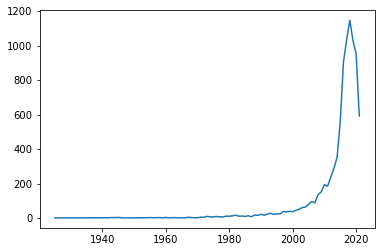

In [126]:
plt.plot(netflix_titles_gr)
plt.show()

<AxesSubplot:>

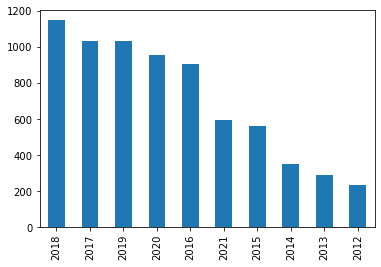

In [127]:
netflix_titles["release_year"].value_counts().head(10).plot(kind = "bar")
#head(10) - для читаемости.

2. Отобразите на одном графике с помощью столбчатой диаграммы динамику изменения числа фильмов (Movie) и телепередач (TV Show).

NameError: name 'bar_width' is not defined

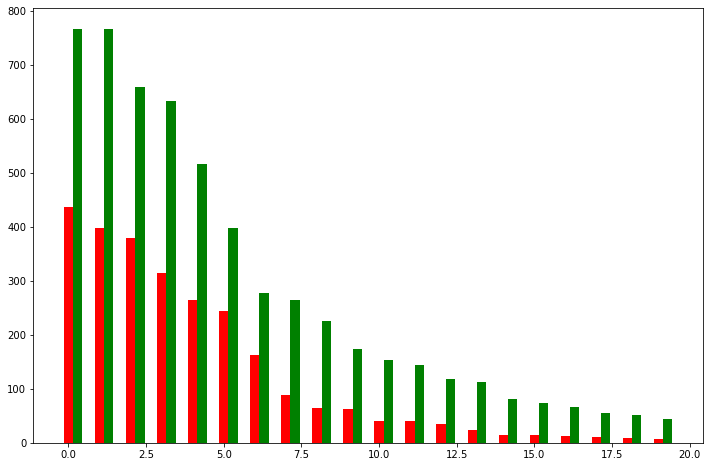

In [128]:
tv_shows = netflix_titles[netflix_titles["type"] == "TV Show"]["release_year"].value_counts().head(20)
movies = netflix_titles[netflix_titles["type"] == "Movie"]["release_year"].value_counts().head(20)

bw = 0.3

fig, ax = plt.subplots(figsize=(12, 8))

index = range(len(tv_shows))

tv_shows_bar = ax.bar(index, tv_shows, bw, color="r")
movies_bar = ax.bar([i + bw for i in index], movies, bw, color="g")

ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(tv_shows.index)

plt.show()

3. В какой стране выпущено больше всего фильмов, телепередач и суммарно фильмов и телепередач. Постройте круговые диаграммы.

In [148]:
netflix_titles["country"].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [179]:
movies = netflix_titles[netflix_titles["type"] == "Movie"]["country"].value_counts()
movies

United States                            2058
India                                     893
United Kingdom                            206
Canada                                    122
Spain                                      97
                                         ... 
United Kingdom, Russia, United States       1
Paraguay, Argentina                         1
United Kingdom, Malawi                      1
Austria, Iraq, United States                1
United Arab Emirates, Jordan                1
Name: country, Length: 651, dtype: int64

<AxesSubplot:ylabel='country'>

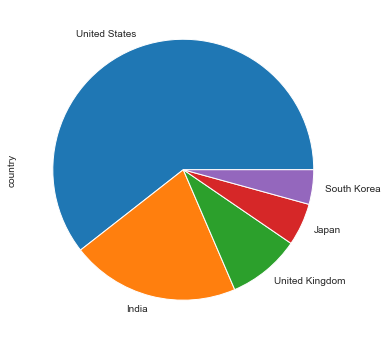

In [197]:
movies.head(5).plot(kind = "pie", figsize = (6, 6))

In [182]:
tv_shows = netflix_titles[netflix_titles["type"] == "TV Show"]["country"].value_counts()
tv_shows

United States                                    760
United Kingdom                                   213
Japan                                            169
South Korea                                      158
India                                             79
                                                ... 
Belarus                                            1
United Kingdom, Australia                          1
France, Australia, Germany                         1
Australia, New Zealand, United States              1
United States, France, South Korea, Indonesia      1
Name: country, Length: 196, dtype: int64

<AxesSubplot:ylabel='release_year'>

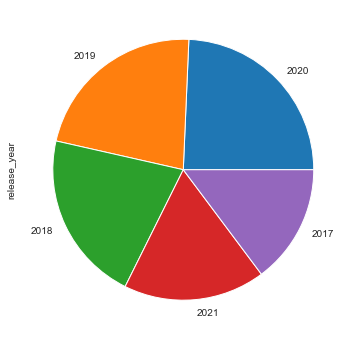

In [198]:
tv_shows.head(5).plot(kind = "pie", figsize = (6, 6))

In [181]:
USA_result = netflix_titles[netflix_titles['country'].str.contains('United States', case=False, na=False)]
#USA_result

In [196]:
#netflix_titles["country"].str.split(', ')
#exploded_netflix_titles = netflix_titles.explode("country")
#exploded_netflix_titles
#exploded_netflix_titles["country"].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

ValueError: pie requires either y column or 'subplots=True'

4. Какой рейтинг встречается чаще всего. Постройте круговую диаграмму, столбчатую диаграмму.

In [144]:
netflix_titles["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [152]:
print(netflix_titles["rating"].value_counts().index[0], netflix_titles["rating"].value_counts().iloc[0])
#Самый часто встречающийся рейтинг и его количество.

TV-MA 3207


<AxesSubplot:ylabel='rating'>

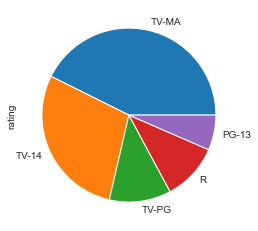

In [158]:
netflix_titles["rating"].value_counts().head(5).plot(kind = "pie")

<AxesSubplot:>

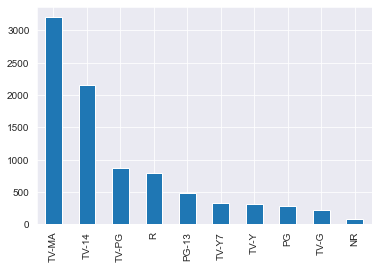

In [157]:
netflix_titles["rating"].value_counts().head(10).plot(kind = "bar")

Используя данные https://www.kaggle.com/datasets/fekihmea/sales-store-overview выполните следующие задания.

5. Проанализируйте (определите границы выбросов с помощью IQR метода, см. пред. занятие) выбросы в числовых столбцах. Постройте "ящики с усами" минимум 3-х типов.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales_store = pd.read_csv('SalesStore.csv')
sales_store

,Order_Date,Ship_Date,Ship_Mode,Postal_Code,Region,Product_Reference,Category,Sub_Category,Sales,Quantity,Profit,State
0,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10022901,Office Supplies,Tape,5,1,0.15,OH
1,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10023012,Office Supplies,Tape,5,1,0.15,OH
2,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10002828,Office Supplies,Tape,5,1,0.15,OH
3,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10022901,Office Supplies,Tape,5,1,0.15,OH
4,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10000482,Office Supplies,Tape,5,1,0.15,OH
...,...,...,...,...,...,...,...,...,...,...,...,...
211,2024-01-09,2024-01-14,Ground,20004,East,ELE-PRI-10021890,Electronics,Printers,300,4,6.00,DC
212,2024-01-09,2024-01-14,Ground,20004,East,ELE-PRI-10022901,Electronics,Printers,300,4,6.00,DC
213,2024-01-09,2024-01-14,Ground,20004,East,ELE-PRI-10002727,Electronics,Printers,300,4,6.00,DC
214,2024-01-09,2024-01-14,Ground,20004,East,ELE-PRI-10021890,Electronics,Printers,300,4,6.00,DC


In [3]:
sales_store.describe()

,Postal_Code,Sales,Quantity,Profit
count,216.000000,216.000000,216.000000,216.000000
mean,55241.750000,290.879630,2.393519,5.843287
std,24946.773328,258.750781,1.085959,5.148745
min,20001.000000,5.000000,1.000000,0.150000
25%,33101.000000,50.000000,1.000000,1.000000
50%,60601.000000,200.000000,2.000000,4.000000
75%,75205.000000,450.000000,3.000000,9.000000
max,98101.000000,900.000000,4.000000,18.000000


In [4]:
sales_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order_Date         216 non-null    object 
 1   Ship_Date          216 non-null    object 
 2   Ship_Mode          216 non-null    object 
 3   Postal_Code        216 non-null    int64  
 4   Region             216 non-null    object 
 5   Product_Reference  216 non-null    object 
 6   Category           216 non-null    object 
 7   Sub_Category       216 non-null    object 
 8   Sales              216 non-null    int64  
 9   Quantity           216 non-null    int64  
 10  Profit             216 non-null    float64
 11  State              216 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 20.4+ KB


In [5]:
#Всё хорошо с столбцами с численными значениями:

In [6]:
sales_store["Postal_Code"].isnull().sum()

0

In [7]:
lower_bound = sales_store["Postal_Code"].quantile(q=0.025)
upper_bound = sales_store["Postal_Code"].quantile(q=0.975)
sales_store[(sales_store["Postal_Code"] < lower_bound) | (sales_store["Postal_Code"] > upper_bound)]

,Order_Date,Ship_Date,Ship_Mode,Postal_Code,Region,Product_Reference,Category,Sub_Category,Sales,Quantity,Profit,State
68,2022-01-18,2022-01-25,Ground,20001,East,OFF-PEN-10004567,Office Supplies,Pens,50,4,1.0,DC
69,2022-01-18,2022-01-25,Ground,20001,East,OFF-PEN-10004567,Office Supplies,Pens,50,4,1.0,DC
70,2022-01-18,2022-01-25,Ground,20001,East,OFF-PEN-10004444,Office Supplies,Pens,50,4,1.0,DC
71,2022-01-18,2022-01-25,Ground,20001,East,OFF-PEN-10005678,Office Supplies,Pens,50,4,1.0,DC
72,2022-01-18,2022-01-25,Ground,20001,East,OFF-PEN-10004567,Office Supplies,Pens,50,4,1.0,DC
73,2022-01-18,2022-01-25,Ground,20001,East,OFF-PEN-10000458,Office Supplies,Pens,50,4,1.0,DC
100,2022-06-14,2022-06-18,Air,98101,West,ELE-HEA-10006789,Electronics,Headphones,150,3,3.0,WA
101,2022-06-14,2022-06-18,Air,98101,West,ELE-HEA-10006789,Electronics,Headphones,150,3,3.0,WA
102,2022-06-14,2022-06-18,Air,98101,West,ELE-HEA-10006666,Electronics,Headphones,150,3,3.0,WA
103,2022-06-14,2022-06-18,Air,98101,West,ELE-HEA-10008901,Electronics,Headphones,150,3,3.0,WA


In [8]:
sales_store["Sales"].isnull().sum()

0

In [9]:
lower_bound = sales_store["Sales"].quantile(q=0.025)
upper_bound = sales_store["Sales"].quantile(q=0.975)
sales_store[(sales_store["Sales"] < lower_bound) | (sales_store["Sales"] > upper_bound)]

,Order_Date,Ship_Date,Ship_Mode,Postal_Code,Region,Product_Reference,Category,Sub_Category,Sales,Quantity,Profit,State
0,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10022901,Office Supplies,Tape,5,1,0.15,OH
1,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10023012,Office Supplies,Tape,5,1,0.15,OH
2,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10002828,Office Supplies,Tape,5,1,0.15,OH
3,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10022901,Office Supplies,Tape,5,1,0.15,OH
4,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10000482,Office Supplies,Tape,5,1,0.15,OH
62,2021-11-12,2021-11-17,Ground,75203,South,FUR-BED-10012890,Furniture,Beds,900,4,18.00,TX
63,2021-11-12,2021-11-17,Ground,75203,South,FUR-BED-10012890,Furniture,Beds,900,4,18.00,TX
64,2021-11-12,2021-11-17,Ground,75203,South,FUR-BED-10001717,Furniture,Beds,900,4,18.00,TX
65,2021-11-12,2021-11-17,Ground,75203,South,FUR-BED-10019890,Furniture,Beds,900,4,18.00,TX
66,2021-11-12,2021-11-17,Ground,75203,South,FUR-BED-10012890,Furniture,Beds,900,4,18.00,TX


In [10]:
#По большому счёту нет особого смысла смотреть на Postal_Code, так как это справочная информация.

<AxesSubplot:>

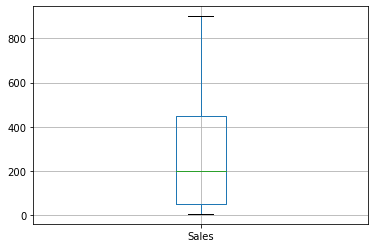

In [11]:
sales_store[["Sales"]].boxplot()

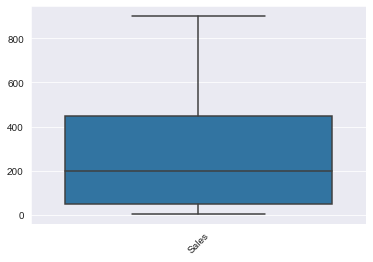

In [12]:
sns.set_style('darkgrid')

sns.boxplot(data=sales_store[["Sales"]])
plt.xticks(rotation = 45);

In [13]:
sales_store["Quantity"].isnull().sum()

0

In [14]:
lower_bound = sales_store["Quantity"].quantile(q=0.025)
upper_bound = sales_store["Quantity"].quantile(q=0.975)
sales_store[(sales_store["Quantity"] < lower_bound) | (sales_store["Quantity"] > upper_bound)]

,Order_Date,Ship_Date,Ship_Mode,Postal_Code,Region,Product_Reference,Category,Sub_Category,Sales,Quantity,Profit,State


<AxesSubplot:>

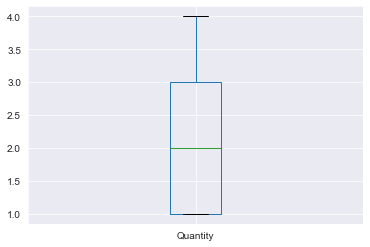

In [15]:
sales_store[["Quantity"]].boxplot()

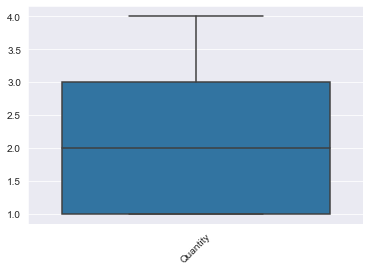

In [16]:
sns.set_style('darkgrid')

sns.boxplot(data=sales_store[["Quantity"]])
plt.xticks(rotation = 45);

In [17]:
sales_store["Profit"].isnull().sum()

0

In [18]:
lower_bound = sales_store["Profit"].quantile(q=0.025)
upper_bound = sales_store["Profit"].quantile(q=0.975)
sales_store[(sales_store["Profit"] < lower_bound) | (sales_store["Profit"] > upper_bound)]

,Order_Date,Ship_Date,Ship_Mode,Postal_Code,Region,Product_Reference,Category,Sub_Category,Sales,Quantity,Profit,State
0,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10022901,Office Supplies,Tape,5,1,0.15,OH
1,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10023012,Office Supplies,Tape,5,1,0.15,OH
2,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10002828,Office Supplies,Tape,5,1,0.15,OH
3,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10022901,Office Supplies,Tape,5,1,0.15,OH
4,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10000482,Office Supplies,Tape,5,1,0.15,OH
62,2021-11-12,2021-11-17,Ground,75203,South,FUR-BED-10012890,Furniture,Beds,900,4,18.00,TX
63,2021-11-12,2021-11-17,Ground,75203,South,FUR-BED-10012890,Furniture,Beds,900,4,18.00,TX
64,2021-11-12,2021-11-17,Ground,75203,South,FUR-BED-10001717,Furniture,Beds,900,4,18.00,TX
65,2021-11-12,2021-11-17,Ground,75203,South,FUR-BED-10019890,Furniture,Beds,900,4,18.00,TX
66,2021-11-12,2021-11-17,Ground,75203,South,FUR-BED-10012890,Furniture,Beds,900,4,18.00,TX


<AxesSubplot:>

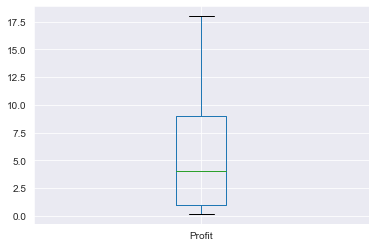

In [19]:
sales_store[["Profit"]].boxplot()

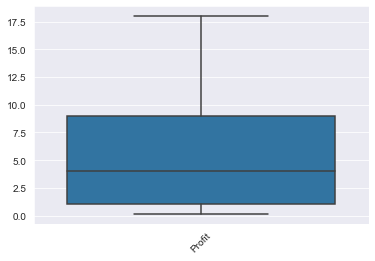

In [20]:
sns.set_style('darkgrid')

sns.boxplot(data=sales_store[["Profit"]])
plt.xticks(rotation = 45);

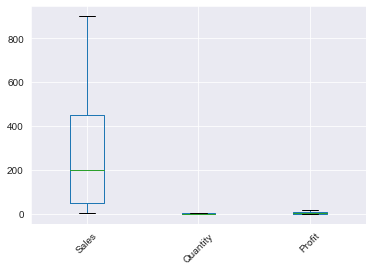

In [21]:
sales_store[["Sales", "Quantity", "Profit"]].boxplot()
plt.xticks(rotation = 45);

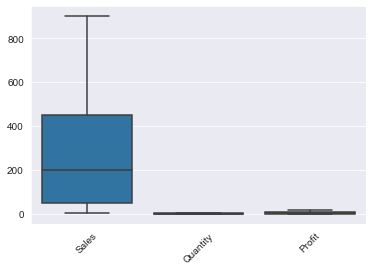

In [22]:
sns.set_style('darkgrid')

sns.boxplot(data=sales_store[["Sales", "Quantity", "Profit"]])
plt.xticks(rotation = 45);

In [23]:
numeric_sales_store = sales_store.select_dtypes(include=['int64', 'float64'])

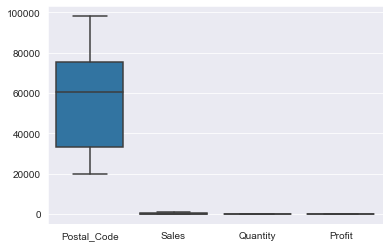

In [24]:
sns.set_style('darkgrid')

sns.boxplot(data=numeric_sales_store);

6. В каком регионе было больше всего заказов? В каком регионе было больше всего заказов с количеством товара более 4 (столбец Quantity)?

In [25]:
sales_store["Region"].value_counts().index[0]

'South'

In [26]:
sales_store[sales_store["Quantity"] > 4]["Region"]
#Таких заказов вообще не было?

Series([], Name: Region, dtype: object)

7. В каком году было больше всего заказов (столбец Order_Date) и какие категории товаров (столбец Category) пользовались наибольшей популярностью?

In [27]:
sales_store["Order_Date"] = pd.to_datetime(sales_store["Order_Date"], errors='coerce')

In [28]:
sales_store["Order_Date"].dt.year.value_counts()

2022    72
2023    71
2021    68
2024     5
Name: Order_Date, dtype: int64

In [29]:
print(sales_store["Order_Date"].dt.year.value_counts().index[0], sales_store["Order_Date"].dt.year.value_counts().iloc[0])
#Самый популярный год и количество покупок в течение него.

2022 72


In [30]:
sales_store["Category"].value_counts()

Office Supplies    73
Electronics        72
Furniture          71
Name: Category, dtype: int64

In [31]:
print(sales_store["Category"].value_counts().index[0], sales_store["Category"].value_counts().iloc[0])

Office Supplies 73


8. В каком регионе было продано больше всего электроники (Electronics) за весь рассматриваемый период? за последний год представленный в данных?

In [32]:
sales_store["Order_Date"] = pd.to_datetime(sales_store["Order_Date"], errors='coerce')

In [33]:
sales_store["Order_Date"]#.value_counts()

0     2021-02-15
1     2021-02-15
2     2021-02-15
3     2021-02-15
4     2021-02-15
         ...    
211   2024-01-09
212   2024-01-09
213   2024-01-09
214   2024-01-09
215   2024-01-09
Name: Order_Date, Length: 216, dtype: datetime64[ns]

In [34]:
electr_data = sales_store[sales_store["Category"] == "Electronics"]
electr_data

,Order_Date,Ship_Date,Ship_Mode,Postal_Code,Region,Product_Reference,Category,Sub_Category,Sales,Quantity,Profit,State
5,2021-03-10,2021-03-15,Air,75201,South,FUR-CH-10000454,Electronics,Phones,500,2,10.0,TX
6,2021-03-10,2021-03-15,Air,75201,South,FUR-CH-10000454,Electronics,Phones,500,2,10.0,TX
9,2021-03-10,2021-03-15,Air,75201,South,FUR-CH-10000454,Electronics,Phones,500,2,10.0,TX
10,2021-03-10,2021-03-15,Air,75201,South,FUR-CH-10000454,Electronics,Phones,500,2,10.0,TX
28,2021-06-25,2021-06-30,Ground,84102,West,ELE-TAB-10010678,Electronics,Tablets,450,2,9.0,UT
...,...,...,...,...,...,...,...,...,...,...,...,...
211,2024-01-09,2024-01-14,Ground,20004,East,ELE-PRI-10021890,Electronics,Printers,300,4,6.0,DC
212,2024-01-09,2024-01-14,Ground,20004,East,ELE-PRI-10022901,Electronics,Printers,300,4,6.0,DC
213,2024-01-09,2024-01-14,Ground,20004,East,ELE-PRI-10002727,Electronics,Printers,300,4,6.0,DC
214,2024-01-09,2024-01-14,Ground,20004,East,ELE-PRI-10021890,Electronics,Printers,300,4,6.0,DC


In [35]:
last_year_electr_data = electr_data[electr_data['Order_Date'].dt.year == electr_data['Order_Date'].dt.year.max()]
last_year_electr_data

,Order_Date,Ship_Date,Ship_Mode,Postal_Code,Region,Product_Reference,Category,Sub_Category,Sales,Quantity,Profit,State
211,2024-01-09,2024-01-14,Ground,20004,East,ELE-PRI-10021890,Electronics,Printers,300,4,6.0,DC
212,2024-01-09,2024-01-14,Ground,20004,East,ELE-PRI-10022901,Electronics,Printers,300,4,6.0,DC
213,2024-01-09,2024-01-14,Ground,20004,East,ELE-PRI-10002727,Electronics,Printers,300,4,6.0,DC
214,2024-01-09,2024-01-14,Ground,20004,East,ELE-PRI-10021890,Electronics,Printers,300,4,6.0,DC
215,2024-01-09,2024-01-14,Ground,20004,East,ELE-PRI-10000481,Electronics,Printers,300,4,6.0,DC


In [36]:
last_year_electr_data["Region"].value_counts()

East    5
Name: Region, dtype: int64

In [37]:
last_year_electr_data["Region"].value_counts().max()
#Было продано больше всего электроники (Electronics) за последний год.

5

In [38]:
sales_store[sales_store["Category"] == "Electronics"]["Region"].value_counts()

South      30
East       18
West       12
Midwest    12
Name: Region, dtype: int64

In [39]:
sales_store[sales_store["Category"] == "Electronics"]["Region"].value_counts().max()
#Было продано больше всего электроники (Electronics) за весь рассматриваемый период.

30

9. Постройте круговую диаграмму по регионам и категориям товаров:

* учитывая все продажи

* учитывая только продажи в регионе East

* учитывая продажи начиная с 2022-06-15

* учитывая только продажи с Profit больше 5

In [40]:
sales_store["Region"]

0      Midwest
1      Midwest
2      Midwest
3      Midwest
4      Midwest
        ...   
211       East
212       East
213       East
214       East
215       East
Name: Region, Length: 216, dtype: object

In [41]:
sales_store["Region"].value_counts()

South      76
Midwest    61
West       49
East       30
Name: Region, dtype: int64

In [42]:
all_sales = sales_store.groupby(["Region", "Category"])["Quantity"].sum()
all_sales

Region   Category       
East     Electronics        51
         Office Supplies    30
Midwest  Electronics        36
         Furniture          56
         Office Supplies    51
South    Electronics        63
         Furniture          81
         Office Supplies    24
West     Electronics        30
         Furniture          30
         Office Supplies    65
Name: Quantity, dtype: int64

<AxesSubplot:ylabel='Quantity'>

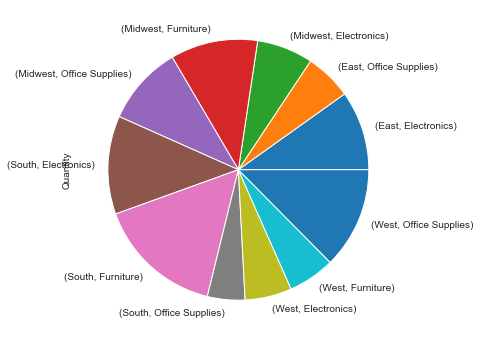

In [43]:
all_sales.plot(kind='pie', figsize=(6,6))
#1

In [44]:
east_sales = sales_store[sales_store["Region"] == "East"].groupby(["Region", "Category"])["Quantity"].sum()
east_sales

Region  Category       
East    Electronics        51
        Office Supplies    30
Name: Quantity, dtype: int64

<AxesSubplot:ylabel='Quantity'>

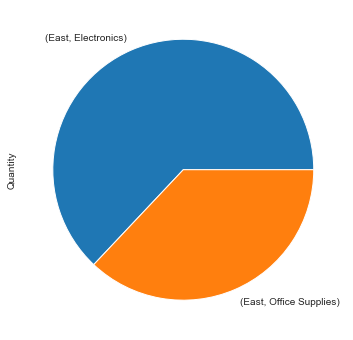

In [45]:
east_sales.plot(kind='pie', figsize=(6,6))
#2

In [46]:
data_sales = sales_store[sales_store["Region"] >= "2022-06-15"].groupby(["Region", "Category"])["Quantity"].sum()
data_sales

Region   Category       
East     Electronics        51
         Office Supplies    30
Midwest  Electronics        36
         Furniture          56
         Office Supplies    51
South    Electronics        63
         Furniture          81
         Office Supplies    24
West     Electronics        30
         Furniture          30
         Office Supplies    65
Name: Quantity, dtype: int64

<AxesSubplot:ylabel='Quantity'>

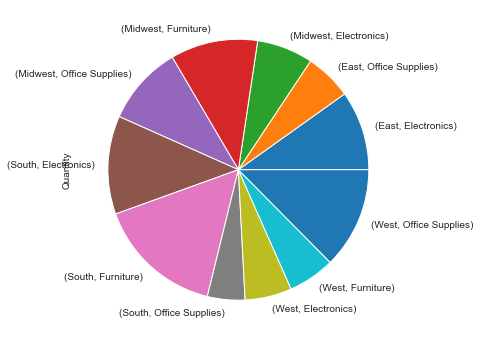

In [47]:
data_sales.plot(kind='pie', figsize=(6,6))
#3

In [48]:
profit_sales = sales_store[sales_store["Profit"] >= 5].groupby(["Region", "Category"])["Quantity"].sum()
profit_sales

Region   Category   
East     Electronics    47
Midwest  Electronics    36
         Furniture      46
South    Electronics    42
         Furniture      66
West     Electronics    12
         Furniture      30
Name: Quantity, dtype: int64

<AxesSubplot:ylabel='Quantity'>

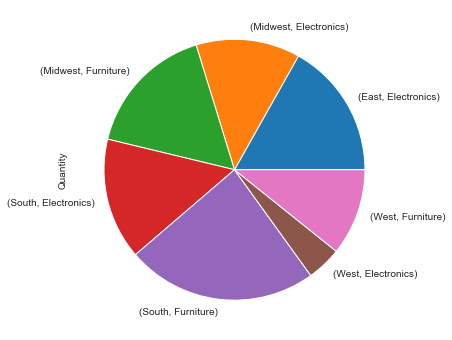

In [49]:
profit_sales.plot(kind='pie', figsize=(6,6))
#4

10. Постройте матрицу корреляций для числовых признаков.

In [50]:
numeric_sales_store = sales_store.select_dtypes(include=['int64', 'float64'])

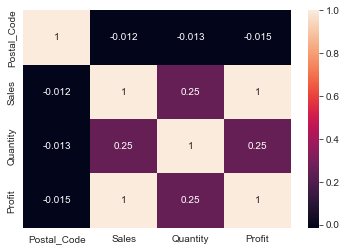

In [54]:
sns.heatmap(numeric_sales_store.corr(), annot = True);